In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzheimer 2/AugmentedAlzheimerDataset',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 1517 images belonging to 4 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzheimer 2/AugmentedAlzheimerDataset',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 376 images belonging to 4 classes.


In [ ]:
#get the class indices
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class_indices:",class_indices)
print("class_names:",class_names)

class_indices: {'mild demented': 0, 'moderate': 1, 'nondemented': 2, 'very mild': 3}
class_names: ['mild demented', 'moderate', 'nondemented', 'very mild']


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')


                  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

model.fit(train_generator,epochs=4,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2789 - loss: 1.9664

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.2800 - loss: 1.9575 - val_accuracy: 0.3298 - val_loss: 1.2935
Epoch 2/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.4308 - loss: 1.1865 - val_accuracy: 0.5426 - val_loss: 1.0696
Epoch 3/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.6052 - loss: 0.9266 - val_accuracy: 0.5851 - val_loss: 0.9520
Epoch 4/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.7015 - loss: 0.7088 - val_accuracy: 0.5878 - val_loss: 0.9328


In [ ]:
model.save('/content/drive/MyDrive/alzheimer 2/ragul2.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/alzheimer 2/ragul2.h5'
)
print("Model loaded")

Model loaded


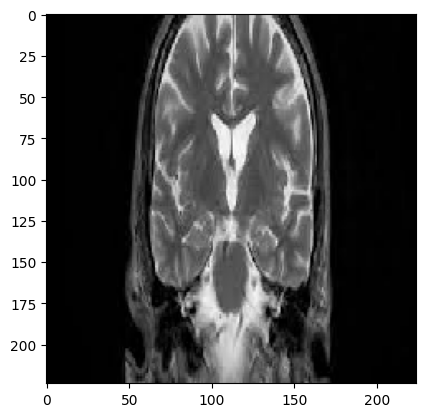

In [ ]:
#test and load
test_image_path="/content/drive/MyDrive/alz2.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
#preprocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [ ]:
#interprete the results
prediction = model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
mild demented
